# Demographic Analysis

Dataset
Heart Disease Dataset donated to UCI ML Dataset Repository https://archive.ics.uci.edu/ml/datasets/heart+Disease. The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

### Exercise Instructions
- Given the sex and age demographic fields, visualize the demographic breakdown by stratifying on the predictor label- 'num_label'(HINT: you can use Seaborn's catplot).
- Be sure to use the following age group boundaries -0, 18, 25, 39,  54, 65, 90 for creating age bins.
- The code below is provided for you to preprocess the dataframe.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
processed_basel_path = "data/processed_swiss.csv"
column_header_list = [
    'age',
   'sex',
   'cp',
   'trestbps',
     'chol',
      'fbs',
      'restecg',
      'thalach',
       'exang',
      'oldpeak',
       'slope',
       'ca',
        'thal', 
     'num_label'
]
processed_basel_df = pd.read_csv(processed_basel_path, names=column_header_list)


In [3]:
processed_basel_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_label
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [4]:
processed_swiss_df = processed_basel_df.replace('?', np.nan)


In [5]:
processed_swiss_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_label
0,32,1,1,95,0,NaN,0,127,0,.7,1,NaN,NaN,1
1,34,1,4,115,0,NaN,NaN,154,0,.2,1,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0,130,1,NaN,NaN,NaN,7,3
3,36,1,4,110,0,NaN,0,125,1,1,2,NaN,6,1
4,38,0,4,105,0,NaN,0,166,0,2.8,1,NaN,NaN,2


In [6]:
subset_df = processed_swiss_df[processed_swiss_df['num_label'].isin([0, 1])]
subset_df['sex'] = subset_df['sex'].replace({1:"male", 0:"female"})
subset_df['num_label'] = subset_df['num_label'].replace({1:"Positive Label: Diameter Narrowing", 0:"Negative Label: Less Diameter Narrowing"})
demo_features = ['sex',  'age', 'num_label' ]
demo_df = subset_df[demo_features]

/var/folders/v_/rh4ycfcn3vd4r73j2nln2brm0000gn/T/ipykernel_13282/3794056220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['sex'] = subset_df['sex'].replace({1:"male", 0:"female"})
/var/folders/v_/rh4ycfcn3vd4r73j2nln2brm0000gn/T/ipykernel_13282/3794056220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['num_label'] = subset_df['num_label'].replace({1:"Positive Label: Diameter Narrowing", 0:"Negative Label: Less Diameter Narrowing"})


In [7]:
demo_df.head()

,sex,age,num_label
0,male,32,Positive Label: Diameter Narrowing
1,male,34,Positive Label: Diameter Narrowing
3,male,36,Positive Label: Diameter Narrowing
5,female,38,Positive Label: Diameter Narrowing
6,male,38,Negative Label: Less Diameter Narrowing


In [8]:
age_bins = [0, 18, 25, 39,  54, 65, 90]
a_bin = [str(x) for x in age_bins ]
age_labels = ["".join(x) for x in zip( [x + " - " for x in a_bin[:-1]], a_bin[1:])]
demo_df['age_bins'] = pd.cut(demo_df['age'], bins=age_bins, labels=age_labels)

/var/folders/v_/rh4ycfcn3vd4r73j2nln2brm0000gn/T/ipykernel_13282/1299943897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_df['age_bins'] = pd.cut(demo_df['age'], bins=age_bins, labels=age_labels)


In [9]:
demo_df.head()

,sex,age,num_label,age_bins
0,male,32,Positive Label: Diameter Narrowing,25 - 39
1,male,34,Positive Label: Diameter Narrowing,25 - 39
3,male,36,Positive Label: Diameter Narrowing,25 - 39
5,female,38,Positive Label: Diameter Narrowing,25 - 39
6,male,38,Negative Label: Less Diameter Narrowing,25 - 39


### Age Bin Grouping

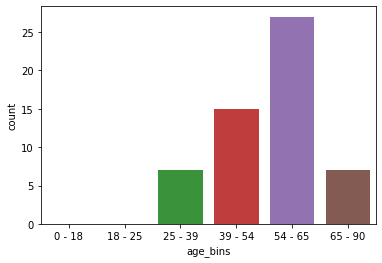

In [10]:
ax = sns.countplot(x="age_bins", data=demo_df)

### Age Bin and Gender Grouping

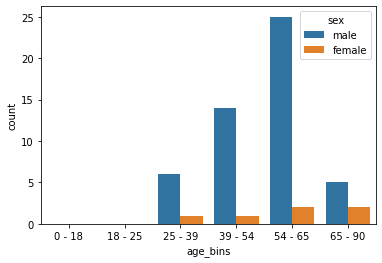

In [11]:
ax = sns.countplot(x="age_bins", hue="sex", data=demo_df)

### Age Bin and Gender Grouping Stratified by Heart Disease Condition (predictor label)

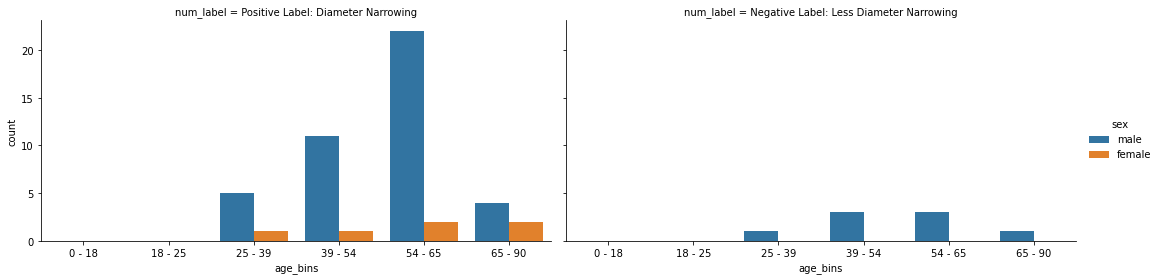

In [12]:
g = sns.catplot(x="age_bins", hue="sex", col="num_label",
                data=demo_df, kind="count",
                height=4, aspect=1.9);